### What is ***EDA***? -> *EDA* (Exploratory Data Analysis)

EDA is not just plotting a few graphs.
It's about understanding the data, checking its quality, and shaping the strategy for preprocessing, feature engineering, and modeling.



# 1. Understanding the Structure of the Data

Check column names, data types(int, float, object), number of raws, and missing values.

Ex) Is Age stored as numeric or string?
How many NaNs are in the feature?

In [1]:
import pandas as pd

df = pd.read_csv("data.csv")
df

Age  Height_cm  Weight_kg    Position  Training_Hours_Per_Week  \
0     22        173         64  Midfielder                11.575308   
1     18        170         67  Midfielder                12.275869   
2     22        186         75     Forward                12.254896   
3     20        172         62    Defender                 9.006678   
4     18        172         94  Midfielder                12.683668   
..   ...        ...        ...         ...                      ...   
795   22        182         63  Goalkeeper                10.624037   
796   21        181         66    Defender                 9.732842   
797   24        182         75  Goalkeeper                 5.494318   
798   20        188         86  Goalkeeper                10.303923   
799   22        186         73  Midfielder                 9.815368   

     Matches_Played_Past_Season  Previous_Injury_Count  Knee_Strength_Score  \
0                            36                      1            77.460279   
1                            37                      2            72.634442   
2                            12                      2            77.064490   
3                            11                      1            82.810232   
4                            10                      2            76.772859   
..                          ...                    ...                  ...   
795                          33                      1            72.678400   
796                          11                      2            67.290644   
797                          17                      3            81.164089   
798                          35                      1            71.184901   
799                          15                      1            59.709613   

     Hamstring_Flexibility  Reaction_Time_ms  Balance_Test_Score  \
0                79.115738        284.487853           91.212476   
1                82.541688        250.579249           87.294078   
2                75.943631        269.119918           83.440688   
3                73.878324        226.376412           87.591894   
4                76.653043        229.021042           83.125161   
..                     ...               ...                 ...   
795              84.620355        240.117111           74.372627   
796              70.726745        260.341118           85.392132   
797              83.486771        264.192657           84.031046   
798              85.585050        204.446478           84.417342   
799              72.966692        255.770337           84.186100   

     Sprint_Speed_10m_s  Agility_Score  Sleep_Hours_Per_Night  \
0              5.874630      77.599705               8.238293   
1              5.796269      94.418987               8.983737   
2              5.731209      70.179176               7.229193   
3              6.220212      83.473824               7.681029   
4              5.385958      87.037256               6.728091   
..                  ...            ...                    ...   
795            5.789511      78.812645               7.631547   
796            5.591874      81.302513               7.676296   
797            5.466771      69.857954               6.798035   
798            6.543996      73.459174               8.846476   
799            5.879201      67.491525               8.109630   

     Stress_Level_Score  Nutrition_Quality_Score  Warmup_Routine_Adherence  \
0             46.616415                81.472206                         1   
1             49.368037                81.056677                         1   
2             43.132808                64.877457                         0   
3             51.528529                89.824744                         1   
4             52.379718                71.569197                         0   
..                  ...                      ...                       ...   
795           70.472112                78.795865           

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         800 non-null    int64  
 1   Height_cm                   800 non-null    int64  
 2   Weight_kg                   800 non-null    int64  
 3   Position                    800 non-null    object 
 4   Training_Hours_Per_Week     800 non-null    float64
 5   Matches_Played_Past_Season  800 non-null    int64  
 6   Previous_Injury_Count       800 non-null    int64  
 7   Knee_Strength_Score         800 non-null    float64
 8   Hamstring_Flexibility       800 non-null    float64
 9   Reaction_Time_ms            800 non-null    float64
 10  Balance_Test_Score          800 non-null    float64
 11  Sprint_Speed_10m_s          800 non-null    float64
 12  Agility_Score               800 non-null    float64
 13  Sleep_Hours_Per_Night       800 non

Observation:
1. There are 19 columns and 800 rows.
2. There is no null data
3. There is only one object data (Position), and rest of them are integer or float.


# 2. Assess Data Quality

1. Detect missing values -> decide whether to impute or drop them.
2. Identify outliers -> decide whether to remove or adjust them.
3. Find duplicate rows or inconsistent entries.

In [3]:
df.isnull().sum() # detecting missing values

Age                           0
Height_cm                     0
Weight_kg                     0
Position                      0
Training_Hours_Per_Week       0
Matches_Played_Past_Season    0
Previous_Injury_Count         0
Knee_Strength_Score           0
Hamstring_Flexibility         0
Reaction_Time_ms              0
Balance_Test_Score            0
Sprint_Speed_10m_s            0
Agility_Score                 0
Sleep_Hours_Per_Night         0
Stress_Level_Score            0
Nutrition_Quality_Score       0
Warmup_Routine_Adherence      0
Injury_Next_Season            0
BMI                           0
dtype: int64

In [4]:
df.describe().round(2) # identify outliers

Age  Height_cm  Weight_kg  Training_Hours_Per_Week  \
count  800.00     800.00     800.00                   800.00   
mean    21.14     177.41      73.24                     9.95   
std      1.99       7.15       9.93                     2.61   
min     18.00     154.00      45.00                     5.00   
25%     19.00     173.00      66.00                     8.13   
50%     21.00     177.00      73.00                     9.90   
75%     23.00     182.00      80.00                    11.54   
max     24.00     200.00     105.00                    18.87   

       Matches_Played_Past_Season  Previous_Injury_Count  Knee_Strength_Score  \
count                      800.00                 800.00               800.00   
mean                        22.33                   1.54                74.93   
std                         10.31                   1.29                 6.67   
min                          5.00                   0.00                52.39   
25%                         13.00                   1.00                70.43   
50%                         22.00                   1.00                75.00   
75%                         32.00                   2.00                79.63   
max                         39.00                   8.00                93.90   

       Hamstring_Flexibility  Reaction_Time_ms  Balance_Test_Score  \
count                 800.00            800.00              800.00   
mean                   79.15            249.42               83.83   
std                     6.78             22.53                6.93   
min                    58.18            180.00               60.06   
25%                    74.50            234.09               79.04   
50%                    79.19            249.13               84.16   
75%                    83.81            265.11               88.88   
max                   100.00            306.73              100.00   

       Sprint_Speed_10m_s  Agility_Score  Sleep_Hours_Per_Night  \
count              800.00         800.00                 800.00   
mean                 5.95          78.34                   7.42   
std                  0.33           8.78                   0.79   
min                  4.86          50.00                   5.00   
25%                  5.73          72.68                   6.85   
50%                  5.94          78.34                   7.42   
75%                  6.16          84.09                   7.99   
max                  6.90         100.00                   9.86   

       Stress_Level_Score  Nutrition_Quality_Score  Warmup_Routine_Adherence  \
count              800.00                   800.00                    800.00   
mean                54.04                    74.38                      0.60   
std                 11.42                     9.32                      0.49   
min                 21.56                    50.00                      0.00   
25%                 45.78                    67.81                      0.00   
50%                 54.05                    74.36                      1.00   
75%                 61.91                    80.50                      1.00   
max                 87.07                   100.00                      1.00   

       Injury_Next_Season     BMI  
count               800.0  800.00  
mean                  0.5   23.38  
std                   0.5    3.67  
min                   0.0   14.35  
25%                   0.0   20.79  
50%                   0.5   23.13  
75%                   1.0   26.02  
max                   1.0   36.26

In [5]:
df.duplicated().any() # find duplicated rows

np.False_

Obervation:
There is no missing values, outliers, dulicate rows. -> Very clean

# 3. Explore Variable Distributoins

First, explore data and divide features into two categories. (Numerical or Categorical)

And then
1. If it is **numerical** feature -> explore mean, standard deviation, distribution shape.
2. If it is **categorical** feature -> explore frequency counts, proportions(value_counts, bar plots).

In [6]:
# Unique value counts
for i in df.columns:
    print(df[i].value_counts())
    print("\n--------------\n")

Age
24    129
21    121
22    118
23    115
19    114
20    105
18     98
Name: count, dtype: int64

--------------

Height_cm
177    52
175    46
174    44
178    44
176    42
173    40
179    40
185    38
181    38
180    38
172    33
183    30
182    30
169    28
184    28
171    22
168    20
170    20
186    18
187    18
167    17
188    16
165    14
189    12
166    11
193    10
191    10
164     9
190     8
163     5
162     4
198     2
159     2
154     2
192     2
160     1
200     1
197     1
196     1
158     1
194     1
157     1
Name: count, dtype: int64

--------------

Weight_kg
71     43
75     37
76     36
69     36
72     31
81     30
83     30
78     29
80     29
74     28
68     26
73     25
65     25
82     24
64     24
77     24
70     22
63     20
60     18
61     18
79     18
66     17
85     17
86     15
58     15
67     15
59     14
62     14
89     13
88     13
91     11
92      8
87      7
84      7
56      7
57      7
95      5
90      5
53      5
93      4


Observation:
1. **Numerical feature** -> 'Age', 'Height_cm', 'Weight_kg', 'Training_Hours_Per_Week' 'Matches_Played_Past_Season, 'Previous_Injury_Count', 'Knee_Strength_Score', 'Hamstring_Flexibility', 'Reaction_Time_ms', 'Balance_Test_Score', 'Sprint_Speed_10m_s', 'Agility_Score', 'Sleep_Hours_Per_Night', 'Stress_Level_Score', 'Nutrition_Quality_Score', 'BMI'

2. **Categorical feature** ->
'Position',
'Warmup_Routine_Adherence', 'Injury_Next_Season'

In [7]:
categorical = ["Position", "Warmup_Routine_Adherence", "Injury_Next_Season"]
numerical = list(df.drop(columns = ["Position", "Warmup_Routine_Adherence",
                                          "Injury_Next_Season"]))


**1. Numerical Features Dstribution**

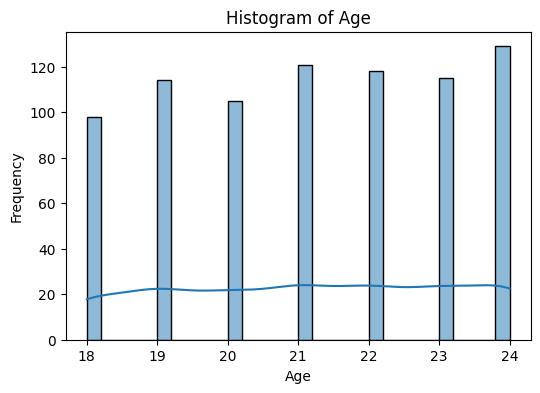

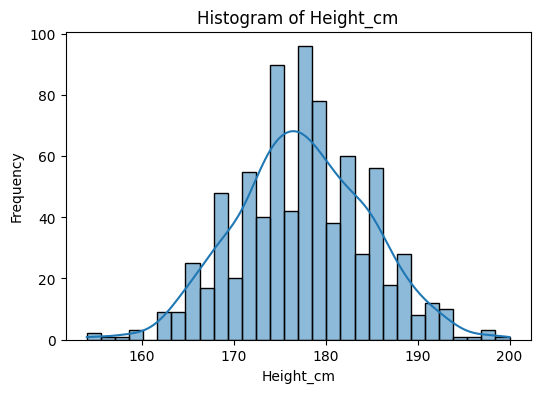

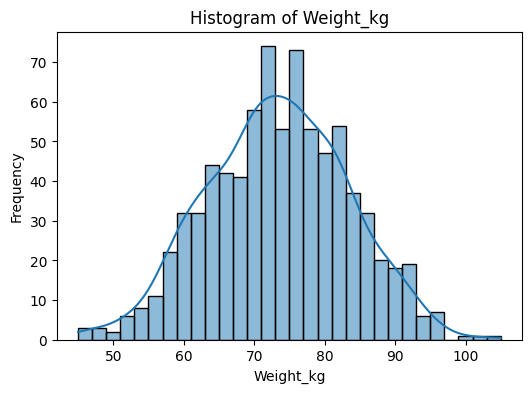

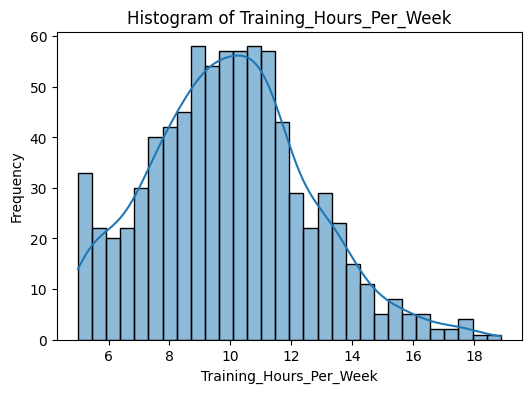

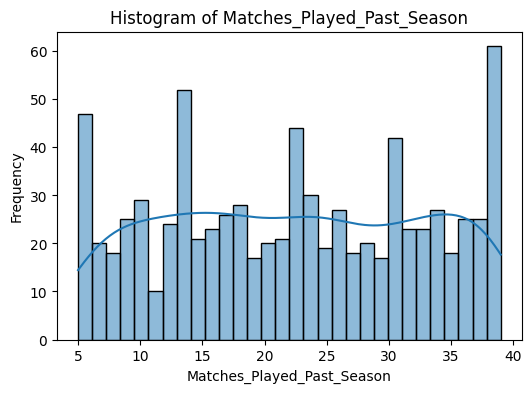

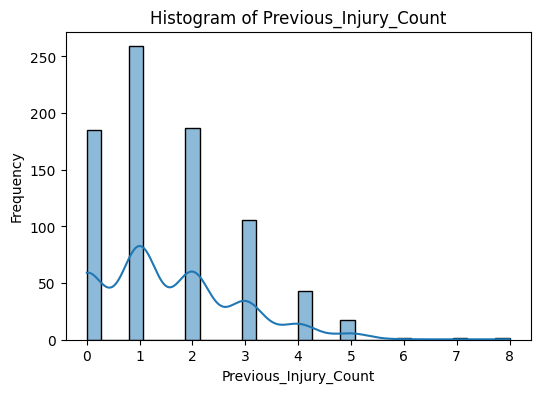

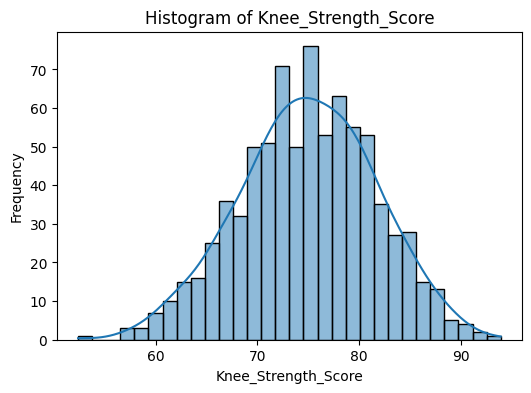

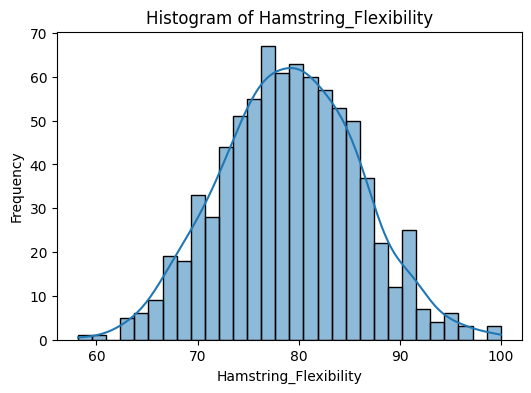

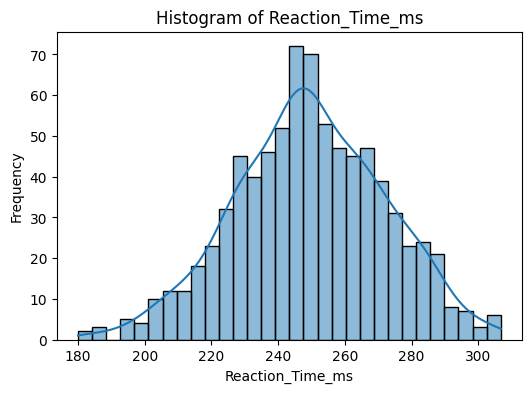

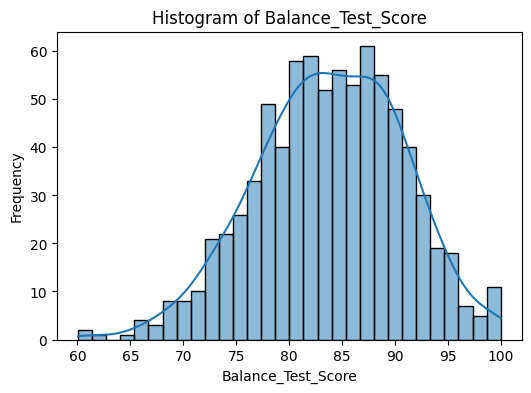

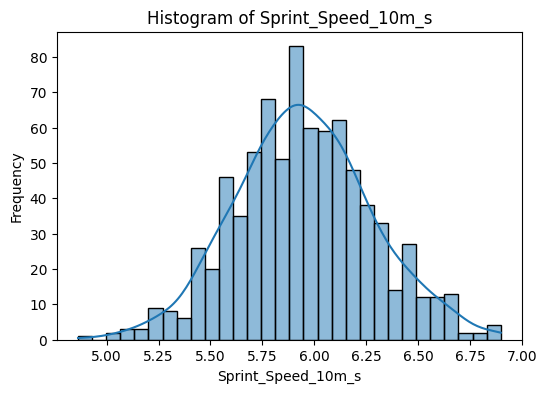

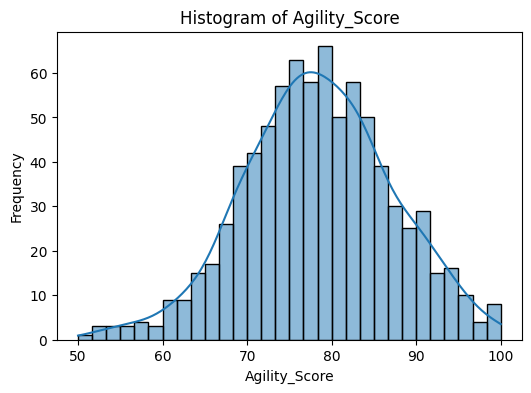

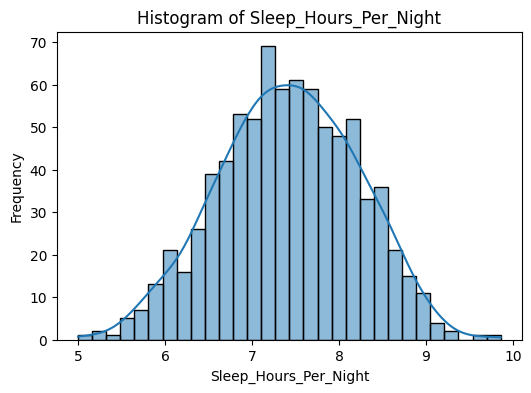

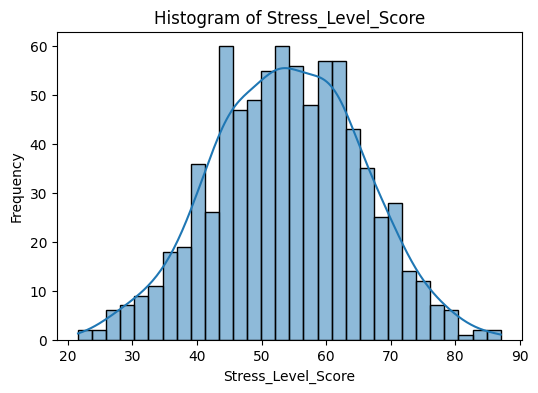

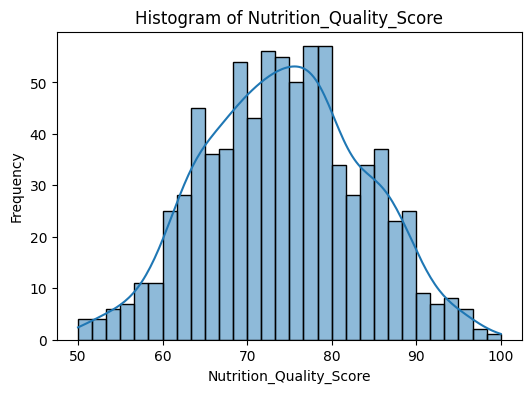

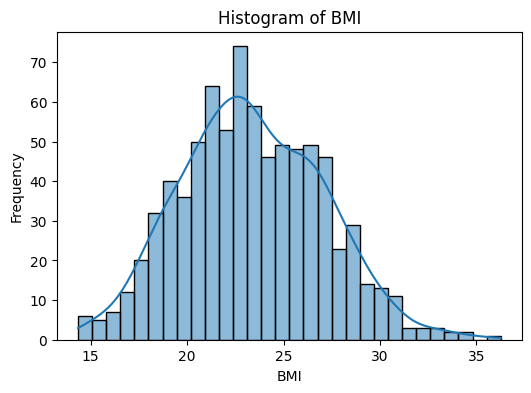

In [20]:
for col in numerical:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

**2. Categorical Features Distribution**

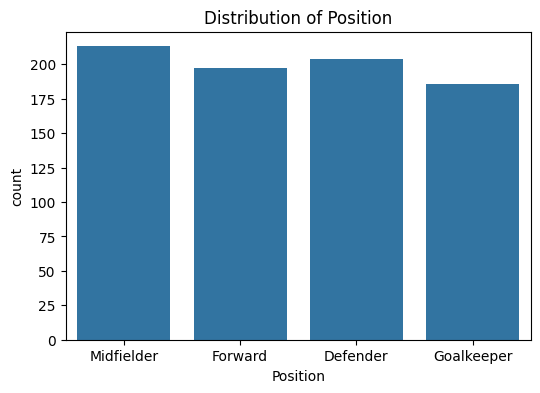

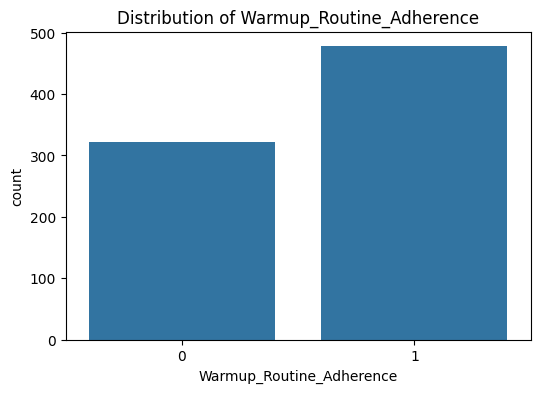

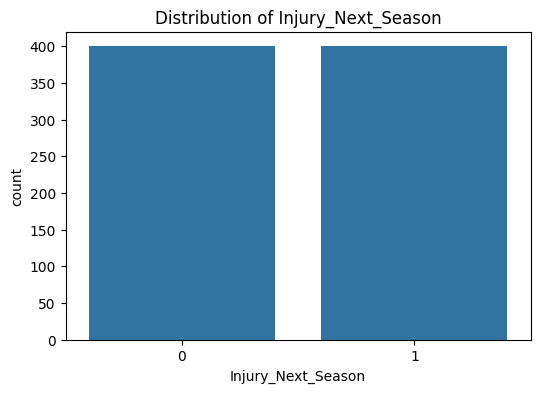

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
#categorical features visualization
for col in categorical:
    plt.figure(figsize=(6, 4))
    sns.countplot(x = col, data = df)
    plt.title(f"Distribution of {col}")
    plt.show()

# 4. Investigate Relationships Between Variables.

1. numerical vs numerical -> correlation matrix and heatmap -> choose some and do scatter plot

2. categorical vs numerical -> with target boxplots

3. categorical vs categorical -> stacked bar chart (countplot with hue)

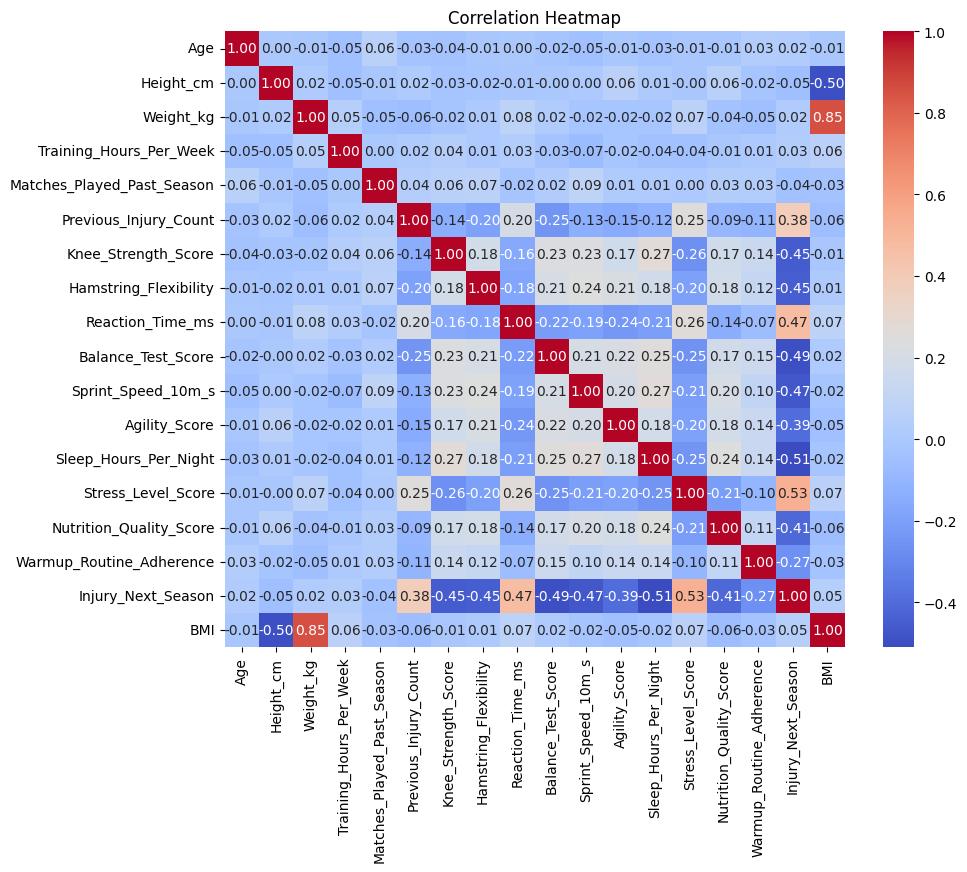

In [23]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

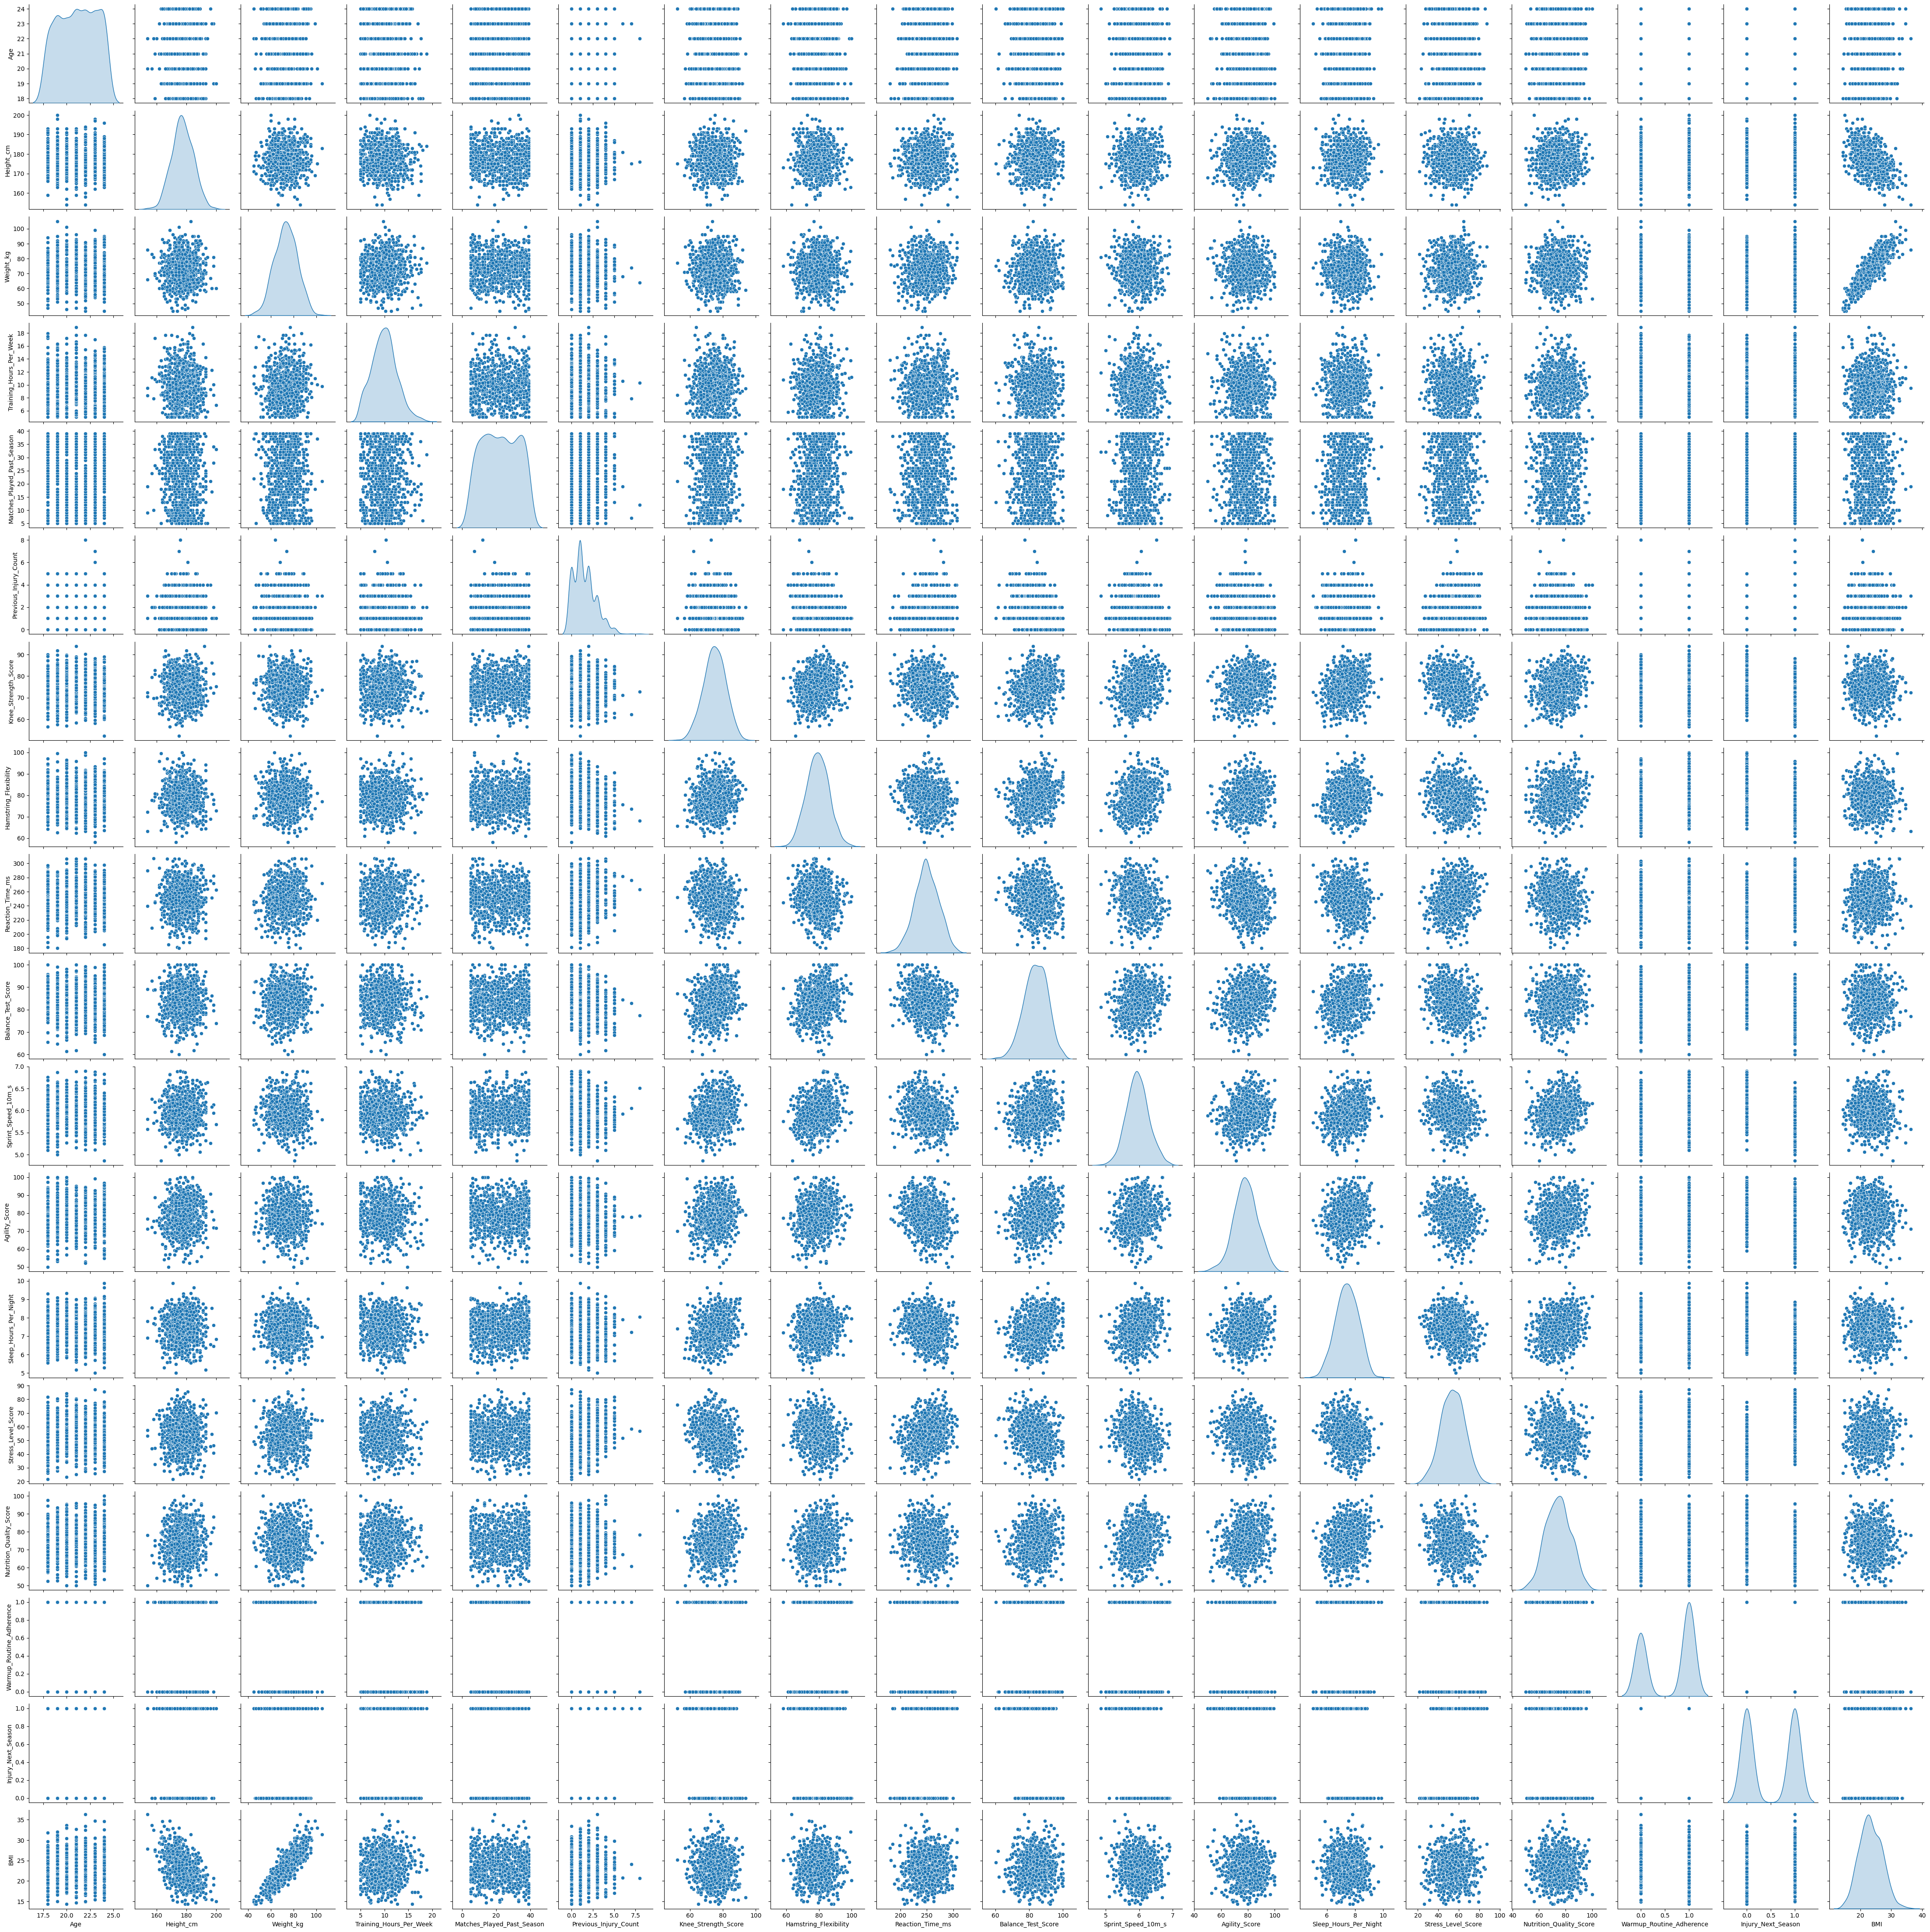

In [24]:
sns.pairplot(df, diag_kind="kde")

In [34]:
target_corr = corr["Injury_Next_Season"].sort_values(ascending=False)
print(target_corr)

Injury_Next_Season            1.000000
Stress_Level_Score            0.529961
Reaction_Time_ms              0.470878
Previous_Injury_Count         0.382226
BMI                           0.047380
Training_Hours_Per_Week       0.033793
Age                           0.021359
Weight_kg                     0.021163
Matches_Played_Past_Season   -0.043910
Height_cm                    -0.054937
Warmup_Routine_Adherence     -0.265089
Agility_Score                -0.393681
Nutrition_Quality_Score      -0.412496
Hamstring_Flexibility        -0.450317
Knee_Strength_Score          -0.454551
Sprint_Speed_10m_s           -0.471499
Balance_Test_Score           -0.494814
Sleep_Hours_Per_Night        -0.510869
Name: Injury_Next_Season, dtype: float64


In [35]:
threshold = 0.3
candidates = target_corr[abs(target_corr) >= threshold].index.tolist()

candidates = [col for col in candidates if col != "Injury_Next_Season"]
print("candidates:", candidates)

candidates: ['Stress_Level_Score', 'Reaction_Time_ms', 'Previous_Injury_Count', 'Agility_Score', 'Nutrition_Quality_Score', 'Hamstring_Flexibility', 'Knee_Strength_Score', 'Sprint_Speed_10m_s', 'Balance_Test_Score', 'Sleep_Hours_Per_Night']


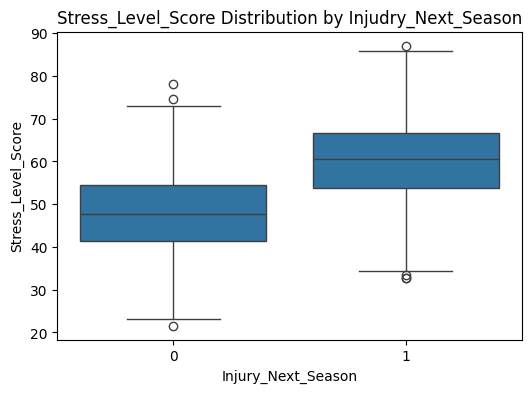

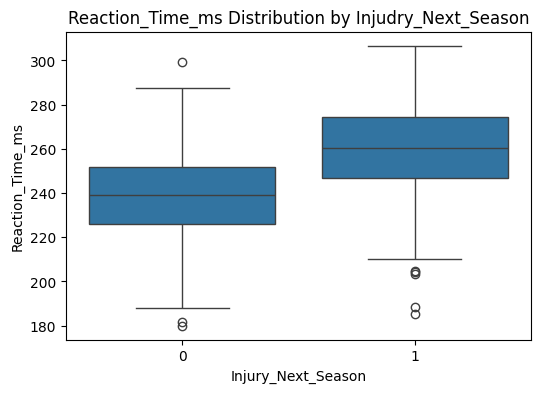

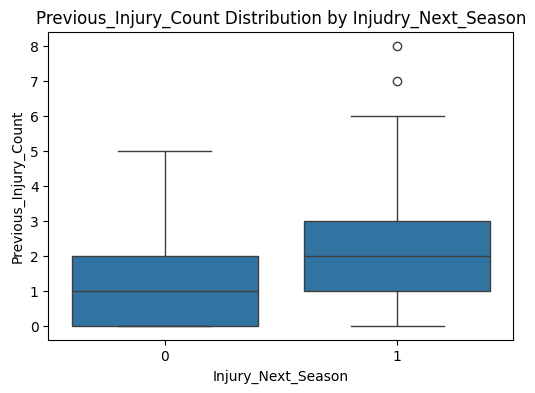

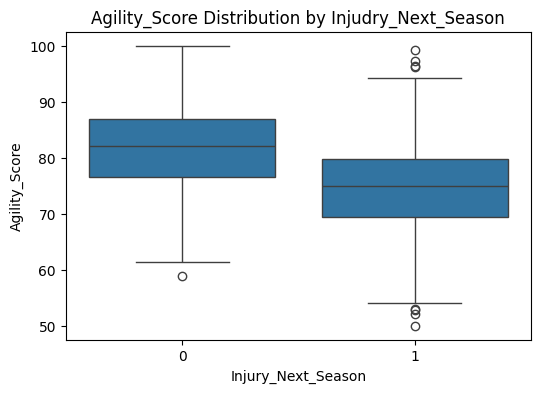

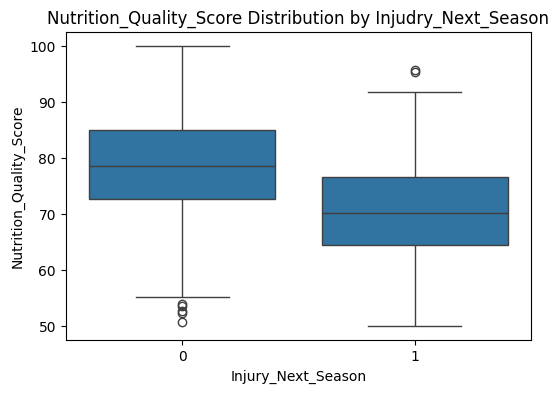

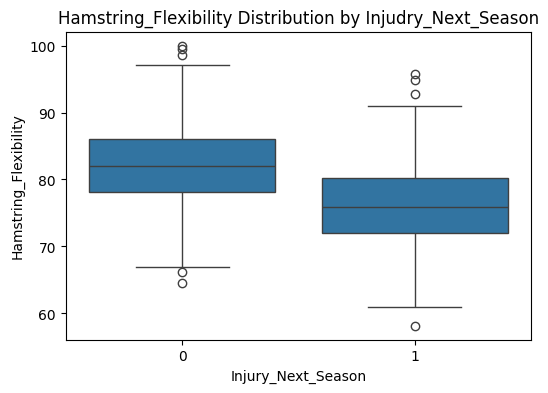

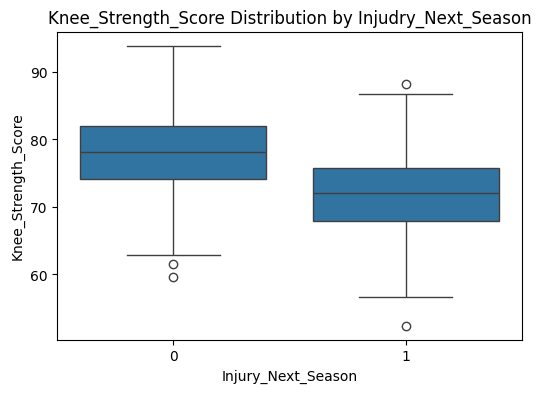

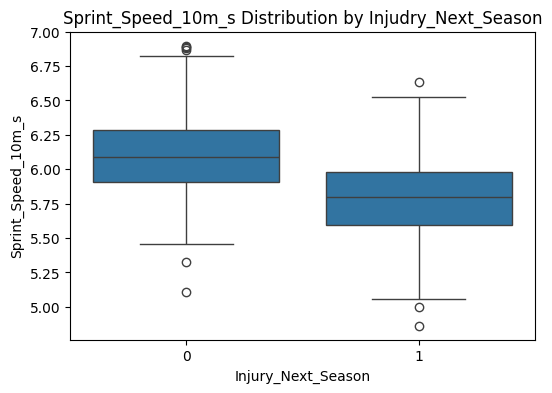

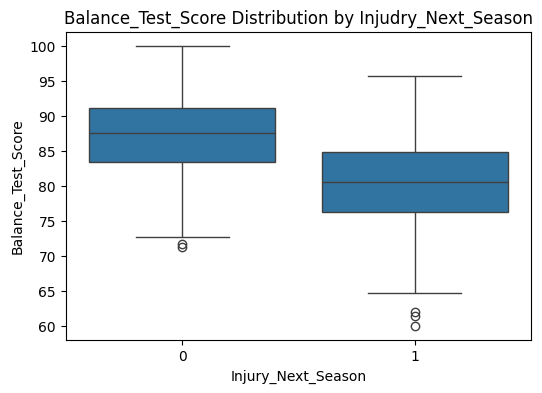

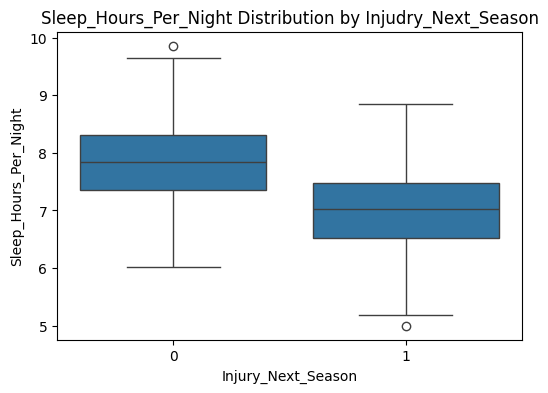

In [40]:
for col in candidates:
    plt.figure(figsize=(6,4))
    sns.boxplot(y= col, x="Injury_Next_Season", data=df)
    plt.title(f"{col} Distribution by Injudry_Next_Season")
    plt.show()

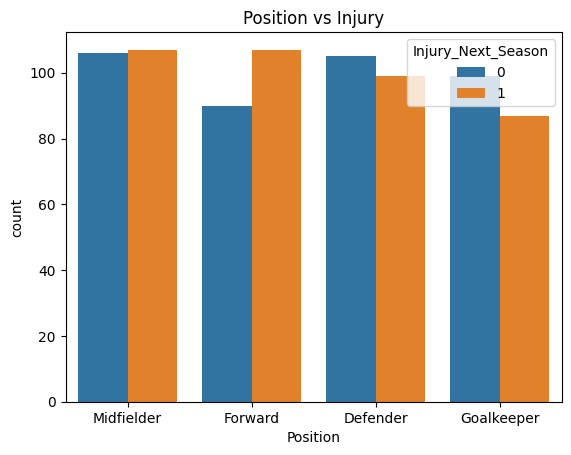

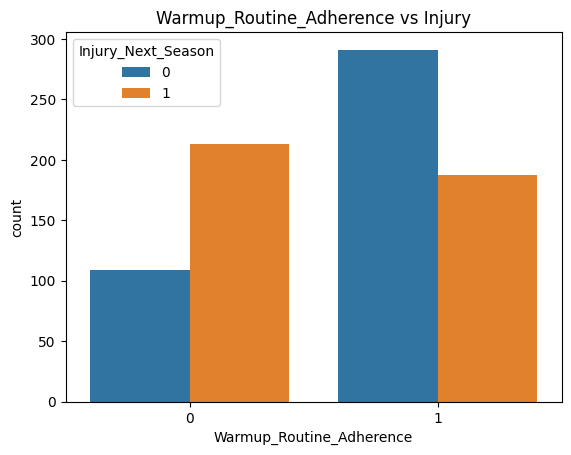

In [33]:
categorical.remove("Injury_Next_Season")
for col in categorical:
    sns.countplot(x= col, hue= "Injury_Next_Season", data = df)
    plt.title(f"{col} vs Injury")
    plt.show()

In [48]:
target_corr = corr["Injury_Next_Season"].abs().sort_values(ascending=False)

threshold = 0.3
filtered = target_corr.drop("Injury_Next_Season")
filtered = filtered[filtered >= threshold]

In [51]:
# change into DataFrame
plot_df = pd.DataFrame({
    "variable": filtered.index,
    "correlation": filtered.values
})

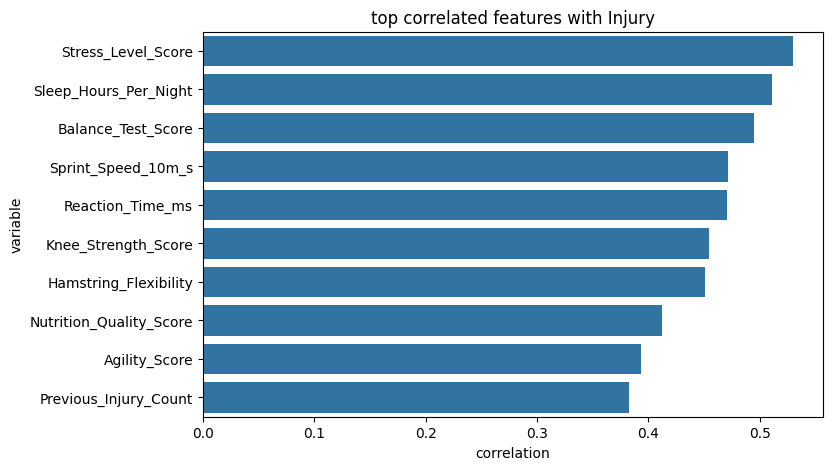

In [53]:
plt.figure(figsize=(8, 5))
sns.barplot(data=plot_df, y="variable", x="correlation")
plt.title("top correlated features with Injury")
plt.show()

Observation: This analysis indicates that top correlated features are Stress_Level, Sleep_Hours, Balance_Test, Sprint_Speed, Reaction_Time, Knee_Strength, Hamstring_Flexibility, Nutrition_Quality, Agility_Score, Previous_Injury.

The analysis shows that higher Stress_Level_Score is strongly associated with a higher lokelihood of injury. In contrast, players who report more sleep_Hours_Per_Night tend to have a lower risk of injury.

This suggests that managing stress and ensuring adequate sleep may play important roles in injury prevention.

# 5. ML Modeling (Ligistic Regression)

In [55]:
# Encoding Position Feature before modeling
data = pd.get_dummies(df, drop_first=True)

In [57]:
from sklearn.model_selection import train_test_split

X = data.drop('Injury_Next_Season', axis=1)
y = data['Injury_Next_Season']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 100)

In [58]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
pred = model.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.94375